Agrupación géneros

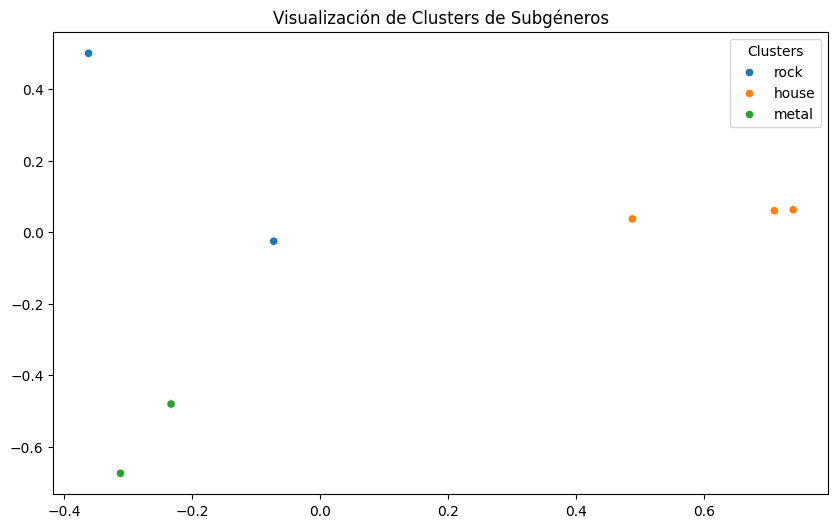

Clusters formados:
Cluster 1 (house): ['deep tropical house', 'tropical house', 'progressive house']
Cluster 0 (rock): ['hard rock', 'punk rock', 'alternative rock', 'otacore']
Cluster 2 (metal): ['symphonic metal', 'doom metal', 'gaian doom']
Outliers: []


In [16]:
from sklearn.cluster import KMeans
import hdbscan
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

def generate_embeddings(tags):
    """Genera embeddings para una lista de etiquetas usando TF-IDF."""
    vectorizer = TfidfVectorizer()
    embeddings = vectorizer.fit_transform(tags).toarray()
    return embeddings

def cluster_embeddings(embeddings, method='hdbscan', num_clusters=10):
    """Agrupa embeddings usando HDBSCAN o KMeans con una opción de macro-categorías."""
    if method == 'hdbscan':
        clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='eom')
    else:
        clusterer = KMeans(n_clusters=num_clusters, random_state=42)
    
    labels = clusterer.fit_predict(embeddings)
    return labels

def assign_cluster_labels(tags, labels):
    """Asigna etiquetas representativas a cada clúster en función de las palabras más comunes."""
    cluster_dict = collections.defaultdict(list)
    for tag, label in zip(tags, labels):
        if label != -1:  # Ignorar outliers en HDBSCAN
            cluster_dict[label].append(tag)
    
    cluster_names = {}
    for cluster_id, cluster_tags in cluster_dict.items():
        word_counts = collections.Counter(" ".join(cluster_tags).split())
        most_common_word = word_counts.most_common(1)[0][0]
        cluster_names[cluster_id] = most_common_word
    
    return cluster_names, cluster_dict

def visualize_clusters(embeddings, labels):
    """Visualiza los clusters en 2D usando reducción de dimensionalidad con PCA."""
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=reduced_embeddings[:,0], y=reduced_embeddings[:,1], hue=labels, palette='tab10', legend=True)
    plt.title("Visualización de Clusters de Subgéneros")
    handles, _ = plt.gca().get_legend_handles_labels()
    cluster_labels = [cluster_names[label] if label in cluster_names else 'Outlier' for label in np.unique(labels)]
    plt.legend(handles, cluster_labels, title="Clusters")
    plt.show()

# Ejemplo de uso
tags = ["deep tropical house", "tropical house", "progressive house", "hard rock", "punk rock", "alternative rock", "symphonic metal", "doom metal", "otacore", "gaian doom"]
num_clusters = 5  # Definir el número de macro-categorías
embeddings = generate_embeddings(tags)
labels = cluster_embeddings(embeddings, method='hdbscan', num_clusters=num_clusters)
cluster_names, clusters = assign_cluster_labels(tags, labels)
visualize_clusters(embeddings, labels)

print("Clusters formados:")
for cluster_id, tag_list in clusters.items():
    print(f"Cluster {cluster_id} ({cluster_names[cluster_id]}): {tag_list}")

# Imprimir géneros que forman parte de la categoría Outlier
outliers = [tag for tag, label in zip(tags, labels) if label == -1]
print(f"Outliers: {outliers}")

In [13]:
import pandas as pd

df  = pd.read_csv(f"canciones_generos_y_subgeneros_integrado.csv")
df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,popularity,release_date,speechiness,tempo,valence,year,genres,main_genre,subgenre_1,subgenre_2
0,0.7210,Olivia Rodrigo,0.585,242014,0.436,1,7lPN2DXiMsVn7XUKtOW1CS,0.000013,10,0.1050,...,100,2021-01-08,0.0601,143.874,0.132,2021,"pop, bedroom pop, sad, ballad",pop,ballad,sad
1,0.4680,Ariana Grande,0.737,172325,0.802,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,...,96,2020-10-30,0.0878,144.015,0.682,2020,"pop, rnb, trap",pop,rnb,trap
2,0.2210,"24kGoldn, iann dior",0.700,140526,0.722,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,...,96,2020-07-24,0.0369,90.989,0.756,2020,"pop, rap, pop rap",pop,rap,pop rap
3,0.2120,KAROL G,0.863,178947,0.666,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,...,95,2020-10-23,0.1520,163.908,0.838,2020,"reggaeton, latin",latin,reggaeton,NaN
4,0.4010,"Bad Bunny, Jhay Cortez",0.731,205090,0.573,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,...,95,2020-10-30,0.0544,109.928,0.145,2020,"rnb, latin, rap",rap,rnb,latin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157679,0.9390,"""Vasílis Besíris Tourkovasílis""",0.465,208347,0.611,0,0OM9aSti0UOwN9yuz1m85y,0.886000,2,0.1450,...,0,1920-01-01,0.0469,93.128,0.803,1920,unknown,unknown,NaN,NaN
157680,0.0808,Tr0ma,0.389,774360,0.810,0,0RdLX7r5HrPOGQabZIjCfi,0.918000,1,0.3320,...,0,1920-01-01,0.1090,161.322,0.071,1920,unknown,unknown,NaN,NaN
157681,0.9900,Hesen Zîrek,0.266,387657,0.660,0,25eqAVo21l5HhveZOt51iZ,0.754000,7,0.8250,...,0,1951-06-02,0.0761,93.597,0.434,1951,unknown,unknown,NaN,NaN
157682,0.9940,Suresh Wadkar,0.568,366907,0.260,0,20Ct8EHjHLEW4iWlE49Fyz,0.869000,1,0.1610,...,0,1951-12-01,0.0468,113.708,0.706,1951,unknown,unknown,NaN,NaN


In [14]:
# Obtener todos los géneros en una lista

# Aplanar la lista de géneros y limpiar comillas
all_genres = [genre.replace("]","").replace("[","").replace("\'","").strip() for sublist in df['genres'] for genre in sublist.split(',')]

# Convertir la lista a un set para obtener géneros únicos
unique_genres = set(all_genres)

# Eliminar valores vacíos si existen
unique_genres.discard('')

print(len(unique_genres))
unique_genres_list = list(unique_genres)


521


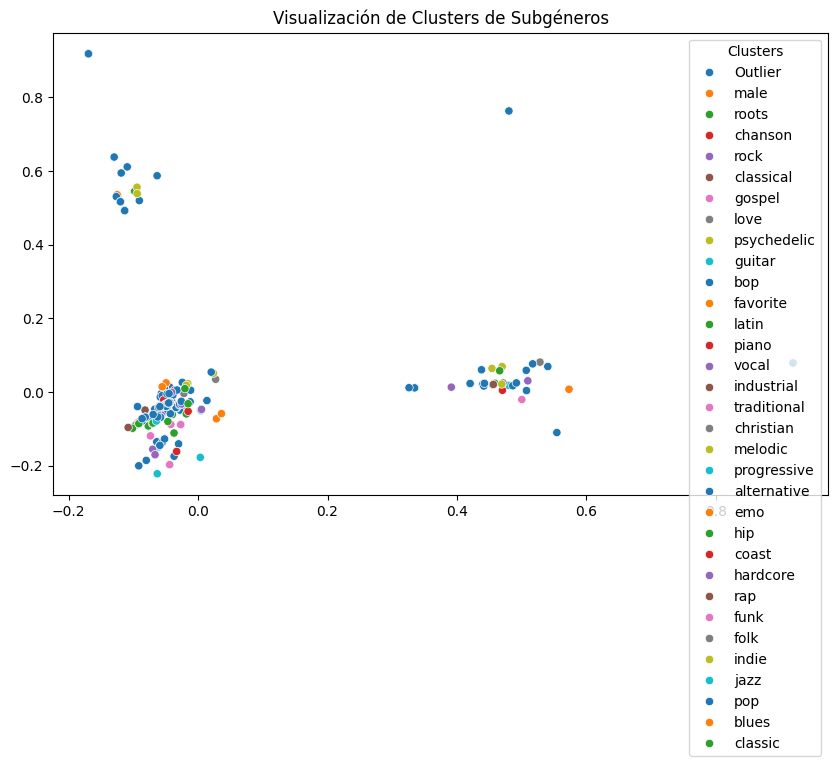

Clusters formados:
Cluster 8 (guitar): ['jazz guitar', 'guitar']
Cluster 25 (funk): ['funk tag', 'funk rock', 'funk metal', 'funk', 'jazz-funk', 'jazz funk', 'g-funk', 'p-funk']
Cluster 22 (coast): ['west coast', 'west coast hip hop', 'east coast hip hop', 'west coast rap']
Cluster 9 (bop): ['bop', 'hard bop']
Cluster 18 (progressive): ['progressive trance', 'progressive rock', 'progressive house', 'progressive', 'house', 'progressive metal']
Cluster 21 (hip): ['hardcore hip hop', 'alternative hip hop', 'southern hip hop', 'hip hop', 'hip-hop', 'experimental hip hop', 'underground hip-hop', 'experimental', 'underground hip hop']
Cluster 4 (classical): ['classical', 'classical music', 'contemporary classical']
Cluster 1 (roots): ['roots', 'roots reggae', 'roots rock']
Cluster 11 (latin): ['latin pop', 'latin rock', 'latin jazz', 'latin']
Cluster 19 (alternative): ['alternative', 'dance', 'alternative metal', 'alternative rock', 'alternative dance', 'alternative rnb']
Cluster 3 (rock): [

In [17]:
num_clusters = 5  # Definir el número de macro-categorías
tags = unique_genres_list
embeddings = generate_embeddings(tags)
labels = cluster_embeddings(embeddings, method='hdbscan', num_clusters=num_clusters)
cluster_names, clusters = assign_cluster_labels(tags, labels)
visualize_clusters(embeddings, labels)

print("Clusters formados:")
for cluster_id, tag_list in clusters.items():
    print(f"Cluster {cluster_id} ({cluster_names[cluster_id]}): {tag_list}")